1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Realiza un análisis con regresión linear multinominal teniendo como target la columna "duración". Es decir, averigua cuánto aumentan o disminuyen la duración cuando se aumenta una unidad los valores de las demás columnas.

- ¿Qué acierto tiene? (score)
- ¿Cuál es el RMSE? ¿Dirías que es un valor alto?
- Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?
- ¿Es la regresión un buen método para este dataset?

In [46]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Cargamos los datos de entrada del archivo csv

In [3]:
dataframe = pd.read_csv("../data/usuarios_win_mac_lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB


In [5]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


In [9]:
print(dataframe.groupby('duracion').size())

duracion
1.000      1
1.064      2
1.088      1
1.105      1
1.169      1
          ..
783.000    1
798.000    1
848.000    1
872.000    1
898.000    1
Length: 87, dtype: int64


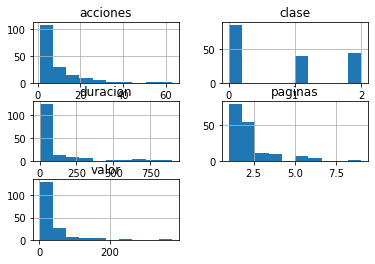

In [7]:
dataframe.hist()
plt.show()

In [51]:
dataframe.corr()

,duracion,paginas,acciones,valor,clase
duracion,1.000000,0.277550,0.163028,0.090869,0.128706
paginas,0.277550,1.000000,0.724061,0.583910,-0.052813
acciones,0.163028,0.724061,1.000000,0.862961,-0.329954
valor,0.090869,0.583910,0.862961,1.000000,-0.322737
clase,0.128706,-0.052813,-0.329954,-0.322737,1.000000


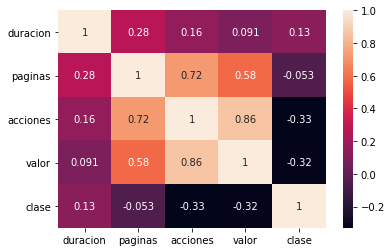

In [52]:
sns.heatmap(dataframe.corr(), annot = True)

In [10]:
X = np.array(dataframe.drop(['duracion'], 1))
y = np.array(dataframe['duracion'])
X.shape

(170, 4)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression(n_jobs=-1)  # -1 to use all processors

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [17]:

model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [21]:
#Displaying the Intercept
print(model.intercept_)  #a

2.8127098603579412


In [22]:
model.coef_

array([56.74966999, -1.43283941, -0.49629566, 32.02178994])

In [32]:
dataframe.shape

(170, 5)

Index(['paginas', 'acciones', 'valor', 'clase'], dtype='object')

In [34]:
coeff_df = pd.DataFrame(model.coef_, dataframe.drop(["duracion"],1).columns, columns=['Coefficient'])
coeff_df

,Coefficient
paginas,56.749670
acciones,-1.432839
valor,-0.496296
clase,32.021790


In [37]:
X_test

array([[  3,  18,  54,   1],
       [  5,  15,  15,   2],
       [  1,   5,  15,   0],
       [  2,  16,  64,   0],
       [  1,   6,  24,   1],
       [  1,   3,  18,   0],
       [  1,   2,   4,   2],
       [  1,   6,  24,   0],
       [  1,   3,   3,   2],
       [  1,   3,   6,   2],
       [  1,   1,   3,   0],
       [  2,   6,  30,   1],
       [  2,  20,  60,   0],
       [  6,   6,   6,   2],
       [  4,  20,  80,   0],
       [  2,   6,  18,   1],
       [  2,   6,  30,   1],
       [  9,  18,  36,   0],
       [  1,   1,   1,   2],
       [  2,   6,  18,   0],
       [  1,   2,  12,   0],
       [  5,   5,   5,   2],
       [  2,   4,  20,   1],
       [  1,   6,  48,   1],
       [  2,  16,  64,   0],
       [  1,   5,  40,   1],
       [  1,   5,  25,   0],
       [  1,   6,  24,   1],
       [  2,  20, 120,   0],
       [  1,   3,   6,   2],
       [  3,   6,  30,   1],
       [  2,   6,  12,   2],
       [  1,   2,   2,   2],
       [  2,   6,   6,   2]])

In [38]:
predictions = model.predict(X_test)
print(predictions)

[152.49243455 321.66761361  44.95374784  61.62369679  71.0760374
  46.33053967 118.75509826  39.05424746 117.81855452 116.32966753
  56.64065345 124.8479334   57.87752182 395.77949925 161.45094851
 130.80348138 124.8479334  469.9019865  121.67682467  98.78169143
  50.74115306 340.95896433 132.67656886  59.16494146  61.62369679
  64.56814618  39.9907912   71.0760374   28.09978196 116.32966753
 181.59760339 165.80304531 119.74768959 168.78081929]


In [39]:
predictions.shape

(34,)

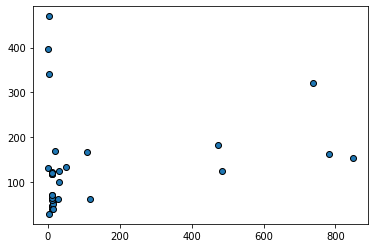

In [40]:
plt.scatter(y_test, predictions, edgecolor='black')

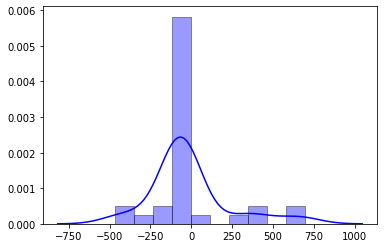

In [54]:
sns.distplot((y_test - predictions), bins = 10, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

In [47]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 158.38316344920455
MSE: 55992.83722550593
RMSE: 236.6280567166665


In [48]:
model.score(X,y)

0.08749468479299527

In [49]:
model.score(X_train,y_train)

0.11822945926275086

In [50]:
model.score(X_test,y_test)

0.006761052940610801